# Mapping Analysis Notebook
# <font color='red'> *NOTE: Make sure to update the trt_API files!* </font>

#### This notebook contains a demonstration of the tools necessary for conducting descriptive analysis of the data. This includes things such as frequency analysis, descripting statistics and temporal frequency.

In [2]:

import folium
import json
from folium import plugins

/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Variables for Analysis

In [3]:
import trt_API.process as proc
import trt_API.process as cleanText
import trt_API.analysis as ana

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SORTED = False

In [4]:
# Set the path to the parent directory containing all Tweets of interest
DIRECTORY = './tweets/*'
# Set to True to isolate english language tweets
ENGLISH = False

## Load Tweet and Generate Dataframe

In [5]:
tweet_objects = proc.loadTweetObjects(DIRECTORY)
encoding = True #Use False on Macs for better results
df = proc.convertTweetsToDataframe(tweet_objects, ENGLISH, encoding)

Loaded utf-8 df.
Initial size: 16042
Dropping duplicates...
Final size: 10472


## Extract Potential Cashtags

In [6]:
ctdf = proc.extractPossibleCashtags(df)
pd.set_option('display.max_rows', None)

Total potential Cashtags: 25


## Removing Noisy Tweets

In [7]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Noisy words can be identified to use to filter such tweets.
*** Enter these words below in the noisy_terms list.
'''
noisy_terms = []
cldf = proc.removeNoisyTerms(df, noisy_terms)
print(cldf)

Removed 0 noisy terms.
                          date  followers         username  \
0      Jun 01 20:02:51 2018\t0         88        Yohanan_L   
1      Jun 01 22:19:01 2018\t0        464        Kiakkye30   
2      Jun 08 00:04:48 2018\t0       1019        KessprdGB   
3      Jun 08 03:27:48 2018\t0         24   quynhnguyen153   
4      Jun 08 07:44:53 2018\t0          1        mlqbuot27   
5      Jun 08 08:32:53 2018\t0       1219    incredibleMoh   
6      Jun 08 10:15:48 2018\t0          1         saza1525   
7      Jun 08 10:22:49 2018\t0       1519   sirdrauhlmccan   
8      Jun 08 11:02:23 2018\t0         99      fairyficent   
9      Jun 08 11:49:35 2018\t0        526         biebyunb   
10     Jun 08 12:00:31 2018\t0         45         mintNS95   
11     Jun 08 12:12:48 2018\t0        585         atikafio   
12     Jun 08 13:33:04 2018\t0          2   namimaruko2548   
13     Jun 08 13:51:12 2018\t0        321        chanameaw   
14     Jun 08 14:53:47 2018\t0        221      

In [8]:
//removing unwanted characters from tweets
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "ð", "https"]
for char in spec_chars:
    cldf['tweet'] = cldf['tweet'].str.replace(char, ' ')
cldf[500:2000]['tweet']

SyntaxError: invalid syntax (<ipython-input-8-d47a2b9d9b86>, line 1)

## Remove Retweets

In [ ]:
cldf_no_RT, cldf = proc.removeRetweets(cldf)
print(cldf[300:500])

Removed 10227 duplicates.
                        date  followers         username  \
371  Apr 27 03:02:01 2018\t0        163       Clamsinger   
372  Apr 27 03:11:40 2018\t0       1566       _Wrightttt   
373  Apr 27 03:13:54 2018\t0        265          soberaf   
374  Apr 27 03:43:13 2018\t0        335  RussellBjornson   
375  Apr 27 03:45:10 2018\t0         76   MonicaGladwell   
376  Apr 27 04:16:04 2018\t0        277        __justin4   
377  Apr 27 05:00:05 2018\t0        195  MarinaKrajewski   
378  Apr 27 05:06:43 2018\t0        496  R23370820Amanda   
379  Apr 27 05:54:00 2018\t0       1792       anabrancal   
380  Apr 27 06:02:56 2018\t0       1559   EarthMineYours   
381  Apr 27 06:26:38 2018\t0       4044    UNIQfurniture   
382  Apr 27 06:40:11 2018\t0       2686  PMOsborneWriter   
383  Apr 27 07:45:20 2018\t0         83        BalochBrp   
384  Apr 27 07:55:22 2018\t0         74        rennylesa   
385  Apr 27 08:16:04 2018\t0        411      clintoinega   
386  Apr 27 08

/Users/rajuy/Documents/twitter_research_tools-master/notebooks/trt_API/process.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT'][df.tweet.astype(str).str[0:2] == 'RT'] = df.tweet.str.split(':',expand=True).iloc[:,0]


In [ ]:
print(cldf_no_RT.shape[0])

13345


## SPLITTING DATA

### By date

In [ ]:
cldf, SORTED = ana.sortByDate(cldf,SORTED,PRINT_TOP=False,TOP=10)
begin = datetime.datetime(2016,10,2,23,59) #year, month, day, hour, minute
end = datetime.datetime(2019,1,2,23,59)
specific_range_cldf = cldf[cldf.date > begin]
specific_range_cldf = specific_range_cldf[specific_range_cldf.date < end]

### By term

In [ ]:
terms_of_interest = ["Trump"]
bsdf = proc.findTerms(cldf, terms_of_interest)

bsdf[:10]

Found 206 terms of interest.


/Users/rajuy/Documents/twitter_research_tools-master/notebooks/trt_API/process.py:177: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.good = df['tweet'].str.lower().str.contains(\


,date,followers,username,location,tweet,original_tweet,RT
9492,2018-03-30 05:19:11,2,UnknownSubvert,None,I love when the US government denies #climates...,The @Bucks go into Oakland and defeat the @war...,None
4895,2018-03-30 05:37:22,36936,brecordernews,Karachi-Pakistan,#US on track to meet #climatetargets despite #...,Aquilegia &amp; Wildflowers Sunset at Rocky Mo...,None
23069,2018-03-30 15:21:28,1490,EarthMineYours,"Richmond, British Columbia",RT @ResistTrumpNow_: About half of Americans d...,About half of Americans donât think #climate...,RT @ResistTrumpNow_
14120,2018-03-30 23:26:09,232,mdblevins2,None,RT @LilaSquad: On #GoodFriday let's pledge to ...,On #GoodFriday let's pledge to be good to Moth...,RT @LilaSquad
15284,2018-03-31 14:31:54,12823,leoniehaimson,NYC,Yup but his claim that positions &amp; actions...,Ice cream #NaturePhotography #Wildlifephotogra...,None
10825,2018-04-01 09:17:57,13,Yuriyvlasow,None,RT @solarimpulse: BREAKING NEWS : Donald Trump...,BREAKING NEWS : Donald Trump agrees to sign Pa...,RT @solarimpulse
1728,2018-04-01 16:39:14,2632,Sufiy,Global.,RT @swtmtlady: AMERICA NEEDS TO GET WITH THE P...,AMERICA NEEDS TO GET WITH THE PROGRAM! #RAREEA...,RT @swtmtlady
10842,2018-04-01 16:57:59,1859,swtmtlady,None,CHECK THIS OUT AMERICA CAN CONTROL THE GLOBAL ...,The #crash is #imminent: The #Chinese experime...,None
1732,2018-04-01 17:16:48,4048,jerryg125,"29 Palms, Ca.","**Please SIGN: Tell @ABC, @CBSNews, @NBCNews a...",None,None
19880,2018-04-01 18:42:37,3957,LCunninghamII2,ð#TheRESISTANCEðhas a Rendezvous with De...,RT @smartdissent: #SmartDissent is a Database ...,#SmartDissent is a Database tracking actions o...,RT @smartdissent


## MAPPING

In [ ]:
with open('./trt_API/us-states.json',encoding='latin1') as f:
    usa = json.load(f)

In [ ]:
citiestxt = open('./../resources/cities.txt','r')
cities = []
for line in citiestxt:
    line = line.split('\t')
    names = []
    names.append(line[2])
    names = names + line[3].split(',')
    for i in range(len(names)):
        names[i] = names[i].lower()
    names.append(line[4])
    names.append(line[5])    
    cities.append(names)

In [ ]:
def ngrams(string, n=3):
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

In [1]:
import pandas as pd 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix
import sparse_dot_topn.sparse_dot_topn as ct  # Leading Juice for us
import time

pd.set_option('display.max_colwidth', -1)

print(bsdf)
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams)
tf_idf_matrix = vectorizer.fit_transform(location)
# print(tf_idf_matrix[0])

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [ ]:
def awesome_cossim_top(A, B, ntop, lower_bound=0):
    # force A and B as a CSR matrix.
    # If they have already been CSR, there is no overhead
    A = A.tocsr()
    B = B.tocsr()
    M, _ = A.shape
    _, N = B.shape
 
    idx_dtype = np.int32
 
    nnz_max = M*ntop
 
    indptr = np.zeros(M+1, dtype=idx_dtype)
    indices = np.zeros(nnz_max, dtype=idx_dtype)
    data = np.zeros(nnz_max, dtype=A.dtype)
    ct.sparse_dot_topn(
        M, N, np.asarray(A.indptr, dtype=idx_dtype),
        np.asarray(A.indices, dtype=idx_dtype),
        A.data,
        np.asarray(B.indptr, dtype=idx_dtype),
        np.asarray(B.indices, dtype=idx_dtype),
        B.data,
        ntop,
        lower_bound,
        indptr, indices, data)
    return csr_matrix((data,indices,indptr),shape=(M,N))

In [ ]:
t1 = time.time()
matches = awesome_cossim_top(tf_idf_matrix, tf_idf_matrix.transpose(), 10, 0.8)
t = time.time()-t1
print("SELFTIMED:", t)

NameError: name 'tf_idf_matrix' is not defined

In [ ]:
def get_matches_df(sparse_matrix, name_vector, top=100):
    non_zeros = sparse_matrix.nonzero()

    sparserows = non_zeros[0]
    sparsecols = non_zeros[1]
    
    if top:
        nr_matches = top
    else:
        nr_matches = sparsecols.size
    
    left_side = np.empty([nr_matches], dtype=object)
    right_side = np.empty([nr_matches], dtype=object)
    similairity = np.zeros(nr_matches)
    
    for index in range(0, nr_matches):
        left_side[index] = name_vector[sparserows[index]]
        right_side[index] = name_vector[sparsecols[index]]
        similairity[index] = sparse_matrix.data[index]
    
    return pd.DataFrame({'left_side': left_side,
                          'right_side': right_side,
                           'similairity': similairity})

matches_df = get_matches_df(matches, location, top=200)
matches_df = matches_df[matches_df['similairity'] < 0.99999] # For removing all exact matches
matches_df.sample(1000)

NameError: name 'matches' is not defined

9492     None                                                                                                                                                      
4895     Karachi-Pakistan                                                                                                                                          
23069    Richmond, British Columbia                                                                                                                                
14120    None                                                                                                                                                      
15284    NYC                                                                                                                                                       
10825    None                                                                                                                                                      
1728     Global.

NameError: name 'locations' is not defined

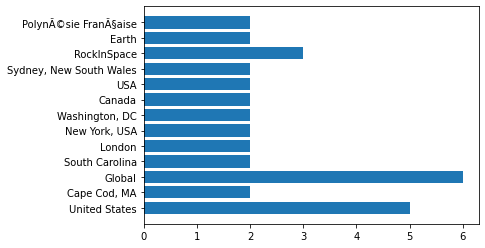

In [ ]:
count=0
locData={}
print(bsdf.location)
for i, ele  in enumerate(bsdf.location):
    
    count=0
    for j, item in enumerate(bsdf.location):
        if(ele == item and (item!="None" or ele!="None")):
            count+=1
            
        if count>=2 and j<=len(bsdf.location)-1:
            locData[ele]=count           
       
group_data = list(locData.values())
group_names = list(locData.keys())
group_mean = np.mean(group_data)

fig, ax = plt.subplots()
ax.barh(group_names, group_data)

for l in bsdf.location:
    try:
        l = l.split(',')
    except:
        continue
    for city in cities:
        if l[0].lower() in city:
            locations.append((float(city[-2]),float(city[-1])))
            break

In [ ]:
locs = np.asarray(locations)

NameError: name 'locations' is not defined

In [ ]:
tweetsMap = folium.Map(location=[34.0522,-118.2437], tiles='Stamen Toner', zoom_start=9)
folium.GeoJson(usa).add_to(tweetsMap)
for i in range(0,len(locs)):
    folium.CircleMarker((locs[i,0],locs[i,1]), radius=3, weight=1, color='blue', \
                        fill_color='blue', fill_opacity=.5).add_to(tweetsMap)  
tweetsMap.add_child(plugins.HeatMap(data=locs, radius=5, blur=10))
tweetsMap.save('../tweetsMap.html')